In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd

# Importing data visualize library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing machine learning library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
df = pd.read_csv('/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df['class'] = [1 if each == 'Abnormal' else 0 for each in df['class']]

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
class,310.0,0.677419,0.468220,0.000000,0.000000,1.000000,1.000000,1.000000


In [6]:
# Check missing value in data.
def print_percent_null(data):
    nan_percent = data.isna().sum() / len(data)
    return nan_percent.apply(lambda x: f"{x:.1%}")
print_percent_null(df)

pelvic_incidence            0.0%
pelvic_tilt numeric         0.0%
lumbar_lordosis_angle       0.0%
sacral_slope                0.0%
pelvic_radius               0.0%
degree_spondylolisthesis    0.0%
class                       0.0%
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


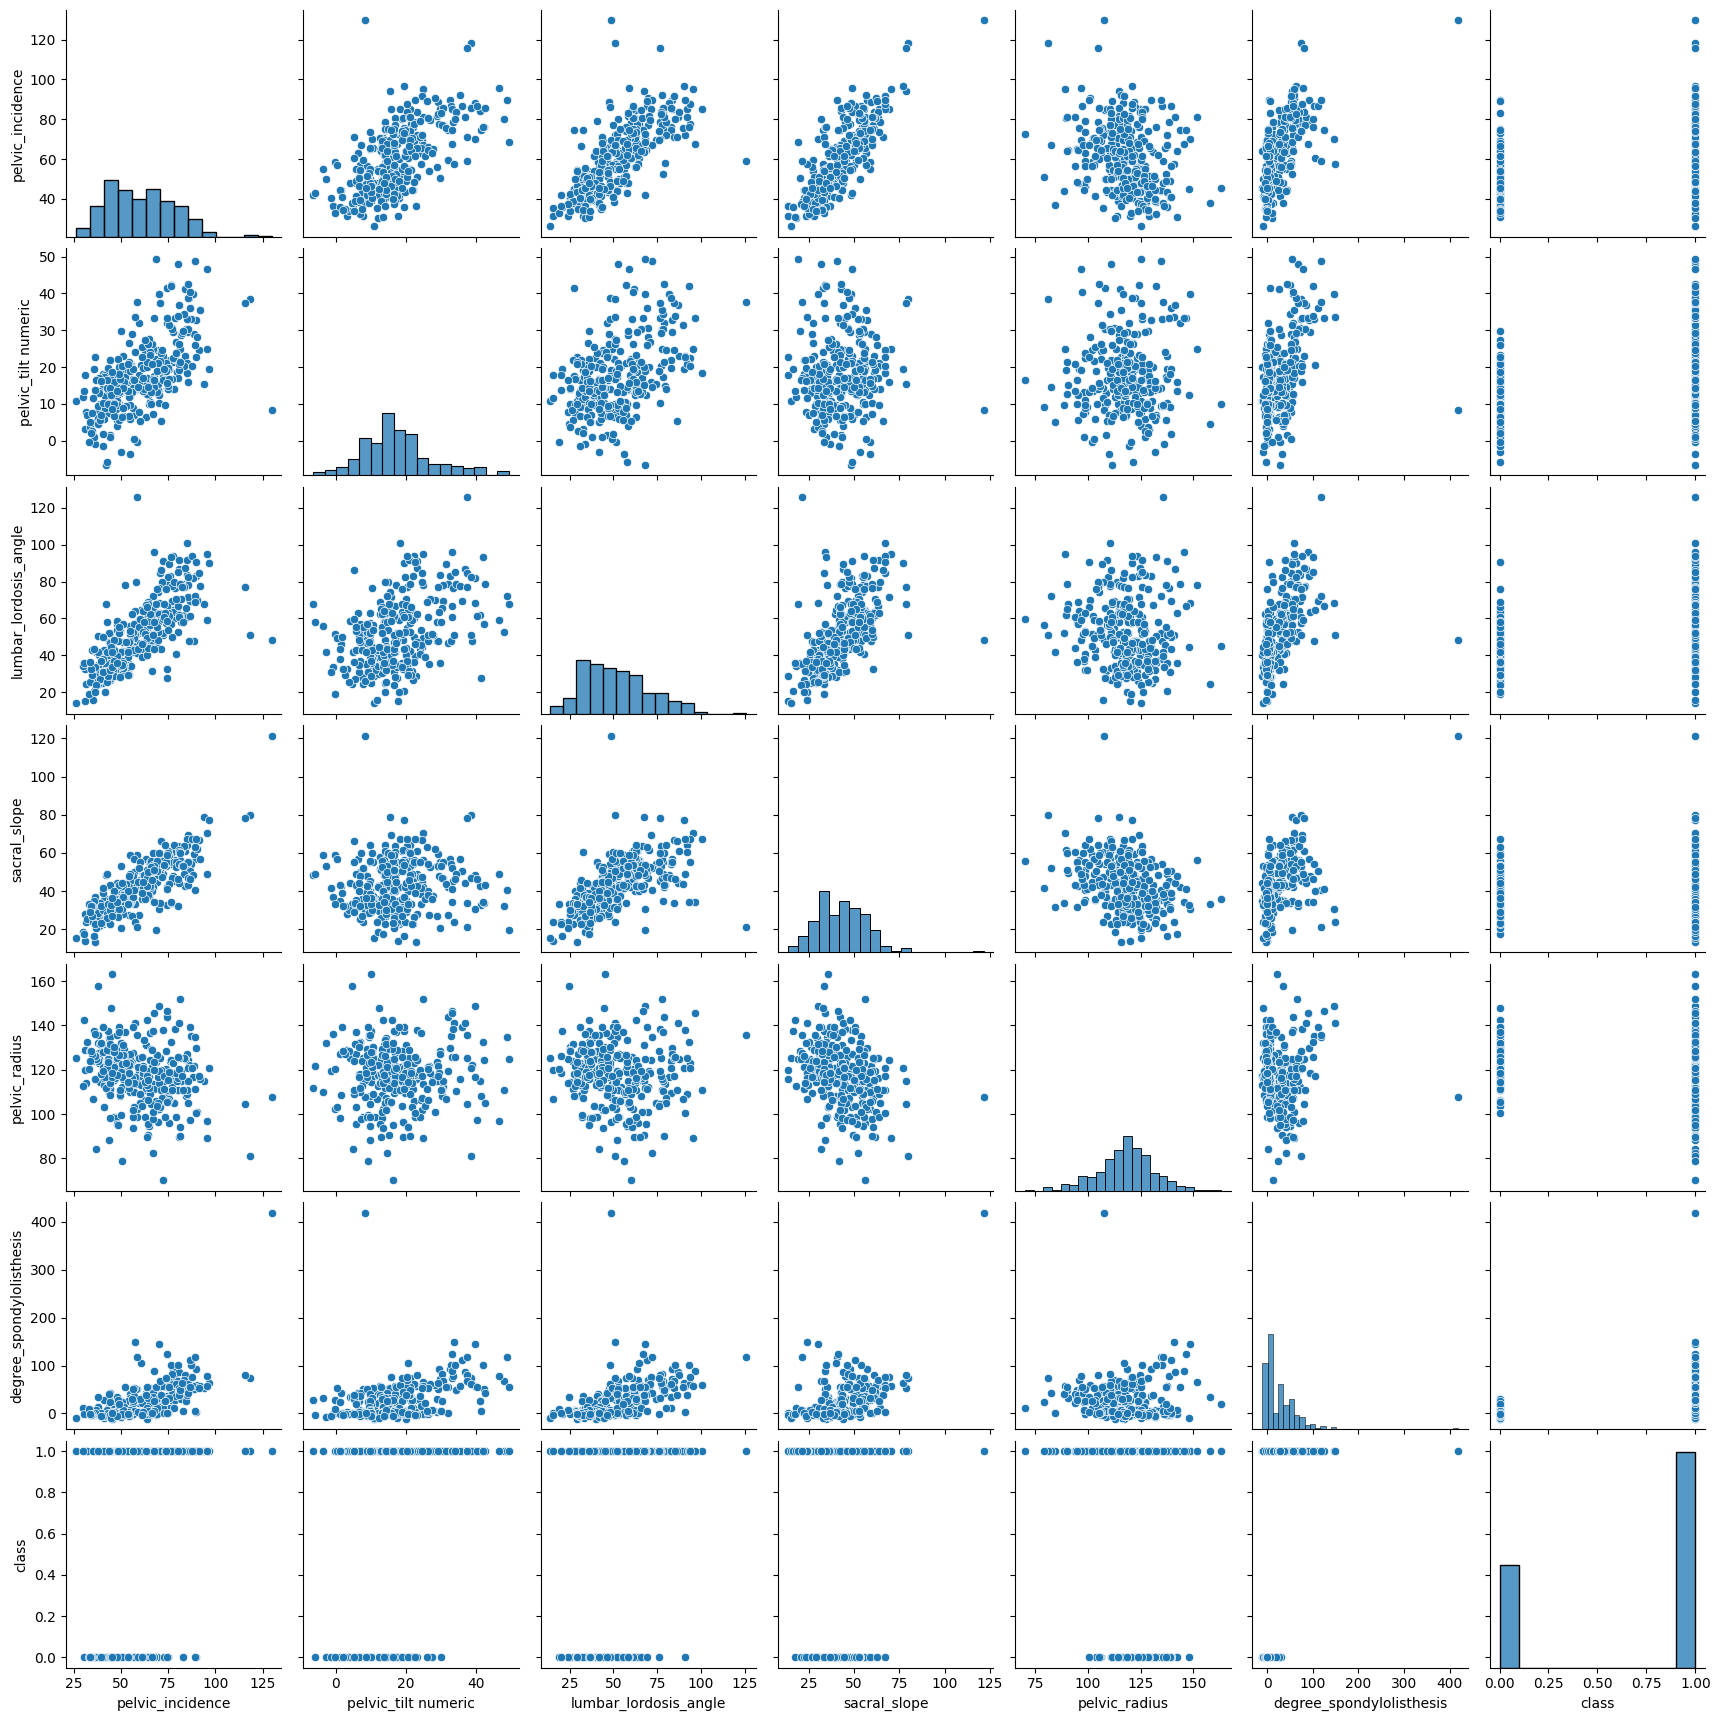

In [7]:
sns.pairplot(df)

In [8]:
# Convert to data continuous type.
x_data = df.drop(['class'], axis=1)
y = df['class'].values

In [9]:
# Normalize data.
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [10]:
# Spliting data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
results = []

models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    GaussianNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),

]
algorithms = [
    'KNeighborsClassifier',
    'LogisticRegression',
    'SVC',
    'GaussianNB',
    'RandomForestClassifier',
    'DecisionTreeClassifier',

]

for model, algorithm in zip(models, algorithms):
    model.fit(x_train, y_train)

    
    pred = model.predict(x_test)
    
    accuracy = accuracy_score(pred, y_test)

    results.append({'Algorithm': algorithm, 'Accuracy': accuracy})

report = pd.DataFrame(results)
report.sort_values('Accuracy', ascending=False)


,Algorithm,Accuracy
0,KNeighborsClassifier,0.849462
2,SVC,0.849462
4,RandomForestClassifier,0.838710
3,GaussianNB,0.817204
5,DecisionTreeClassifier,0.795699
1,LogisticRegression,0.709677


In [12]:
# Create variable for confusion matrix.
y_pred = pred
y_true = y_test
cm = confusion_matrix(y_true, y_pred)

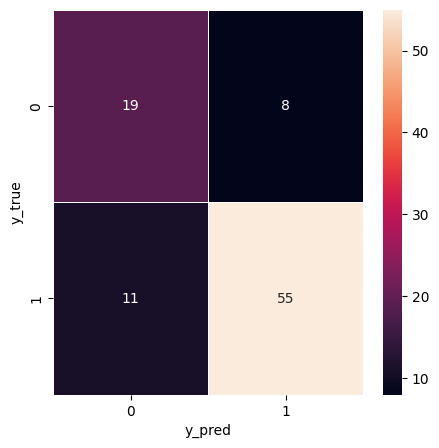

In [13]:
# Analysis with confusion_matrix.
# 0: normal, 1: abnormal.
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, fmt='.0f', ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()